Link drive dataset:
https://drive.google.com/drive/folders/1JlQCJ2ZJosZu9cWl3ESBzjbEJzjZ3Yi8?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
gdrive	sample_data


In [2]:
%cd /content/gdrive/My Drive/DATASET/train
!ls

/content/gdrive/My Drive/DATASET/train
freshapples  freshlemon    rottenapples  rottenlemon
freshbanana  freshoranges  rottenbanana  rottenoranges


In [3]:
import os
labels = os.listdir('/content/gdrive/My Drive/DATASET/train')
labels

['freshapples',
 'freshbanana',
 'freshoranges',
 'rottenapples',
 'rottenbanana',
 'rottenoranges',
 'freshlemon',
 'rottenlemon']

In [4]:
base_dir = os.path.join('/content/gdrive/My Drive/DATASET/train')
labels = os.listdir(base_dir)

label_and_items = {}

for label in labels:
  items = os.listdir(os.path.join(base_dir, label))
  label_and_items[label] = len(items)

label_and_items

{'freshapples': 1693,
 'freshbanana': 1581,
 'freshoranges': 1466,
 'rottenapples': 2342,
 'rottenbanana': 2224,
 'rottenoranges': 1595,
 'freshlemon': 1125,
 'rottenlemon': 951}

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.0,
                     rotation_range=20,
                     shear_range=0.2,
                     zoom_range=0.2,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='nearest',
                     validation_split=0.2)

In [6]:
train_generator = train_datagen.flow_from_directory(
            base_dir,
            target_size=(150, 150),
            batch_size=32,
            class_mode='categorical',
            subset='training')
    
validation_generator = train_datagen.flow_from_directory(
            base_dir,
            target_size=(150, 150),
            batch_size=32,
            class_mode='categorical',
            subset='validation')

Found 10384 images belonging to 8 classes.
Found 2593 images belonging to 8 classes.


In [7]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(labels), activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') >= 0.95 and logs.get('val_accuracy') >= 0.95:
      print('STOP')
      self.model.stop_training = True

callbacks = myCallback()

In [14]:
history=model.fit(
      train_generator,
      steps_per_epoch=20,  #berapa batch yang akan dieksekusi pada setiap epoch
      epochs=100, #tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, #menampilkan akurasi pengujian data validasi
      validation_steps=4,  #berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      callbacks=[callbacks])

Epoch 1/100
20/20 - 76s - loss: 0.4819 - accuracy: 0.8359 - val_loss: 0.6225 - val_accuracy: 0.7578 - 76s/epoch - 4s/step
Epoch 2/100
20/20 - 71s - loss: 0.4623 - accuracy: 0.8313 - val_loss: 0.4081 - val_accuracy: 0.8438 - 71s/epoch - 4s/step
Epoch 3/100
20/20 - 66s - loss: 0.3607 - accuracy: 0.8656 - val_loss: 0.3095 - val_accuracy: 0.8750 - 66s/epoch - 3s/step
Epoch 4/100
20/20 - 61s - loss: 0.3759 - accuracy: 0.8781 - val_loss: 0.5568 - val_accuracy: 0.8047 - 61s/epoch - 3s/step
Epoch 5/100
20/20 - 60s - loss: 0.3323 - accuracy: 0.8797 - val_loss: 0.3845 - val_accuracy: 0.8672 - 60s/epoch - 3s/step
Epoch 6/100
20/20 - 55s - loss: 0.4093 - accuracy: 0.8453 - val_loss: 0.5450 - val_accuracy: 0.7812 - 55s/epoch - 3s/step
Epoch 7/100
20/20 - 55s - loss: 0.3637 - accuracy: 0.8672 - val_loss: 0.3191 - val_accuracy: 0.8750 - 55s/epoch - 3s/step
Epoch 8/100
20/20 - 50s - loss: 0.3759 - accuracy: 0.8531 - val_loss: 0.2731 - val_accuracy: 0.9062 - 50s/epoch - 3s/step
Epoch 9/100
20/20 - 51s 

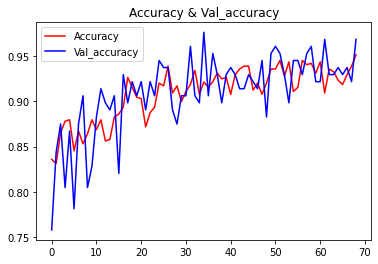

<Figure size 432x288 with 0 Axes>

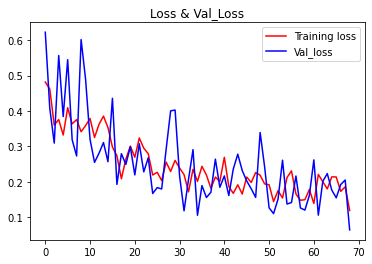

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt    

acc = history.history['accuracy']                                                
val_acc = history.history['val_accuracy']                                         
loss = history.history['loss']                                                    
val_loss = history.history['val_loss']                                            

epochs = range(len(acc))                                                          

plt.plot(epochs, acc, 'r', label='Accuracy')                                                 
plt.plot(epochs, val_acc, 'b', label='Val_accuracy')                          
plt.title('Accuracy & Val_accuracy')                                        
plt.legend(loc=0)                                                                 
plt.figure()                                                                      
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Val_loss')
plt.title('Loss & Val_Loss')
plt.legend(loc=0)
plt.figure()
plt.show()


In [18]:
print(train_generator.class_indices)

{'freshapples': 0, 'freshbanana': 1, 'freshlemon': 2, 'freshoranges': 3, 'rottenapples': 4, 'rottenbanana': 5, 'rottenlemon': 6, 'rottenoranges': 7}
